In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.utils import degree, remove_self_loops, add_self_loops
from torch_geometric.nn import GATConv

class GATNet(nn.Module):
    def __init__(self):
        super(GATNet, self).__init__()
        self.conv1 = GATConv(dataset.num_features, 8, heads=8, dropout=0.6)
        self.conv2 = GATConv(8*8, dataset.num_classes, dropout=0.6)

    def forward(self, data):
        x = F.dropout(data.x, p=0.4, training=self.training)
        x = F.relu(self.conv1(x, data.edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, data.edge_index)
        return F.log_softmax(x, dim=1)

In [1]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.1 MB/s eta 0:00:00


Cora

In [3]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='./dataset/Cora', name='Cora')

Processing...
Done!


In [4]:
import os
import torch
import torch.nn.functional as F

# Create directory if it doesn't exist
directory = 'LossAndAccuracy'
if not os.path.exists(directory):
    os.makedirs(directory)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GATNet().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

filename = 'LossAndAccuracy/GAT_Cora.txt'

model.train()
for epoch in range(2000):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    model.eval()
    _, pred = model(data).max(dim=1)
    correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
    acc = correct / data.test_mask.sum().item()

    with open(filename,'a') as f:
        f.write('{:02d} {:.4f} {:.4f}\n'.format(epoch, loss, acc))

Test Model

In [5]:
model.eval()
_, pred = model(data).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7250


Draw Curve

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data_cora =np.loadtxt("LossAndAccuracy/GAT_Cora.txt")

x = data_cora[:,0] # epoch
y1 = data_cora[:,1] # loss
y2 = data_cora[:,2] # accuracy

Text(0.5, 1.0, 'loss for training GAT on cora')

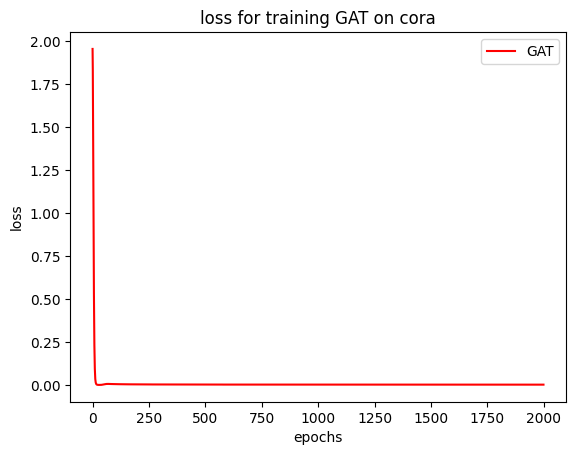

In [7]:
# Draw the loss curve

p2 = pl.plot(x, y1,'r-', label = u'GAT')
pl.legend()
pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GAT on cora')

Text(0.5, 1.0, 'accuracy for training GAT on cora')

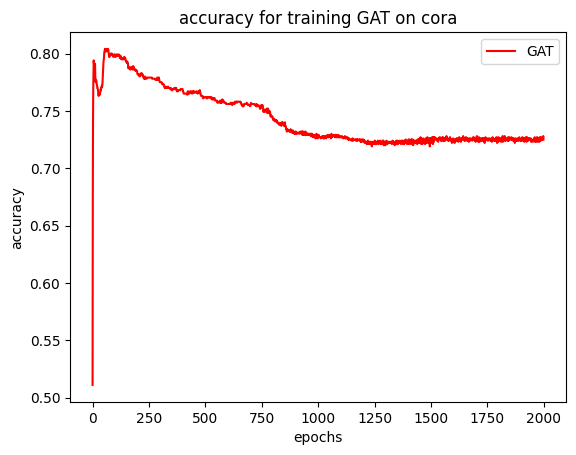

In [8]:
# Draw the overall accuracy curve

p2 = pl.plot(x, y2,'r-', label = u'GAT')
pl.legend()
pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GAT on cora')

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Your plotting code here

# Create directory if it doesn't exist
directory = 'graphs'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the plot
plt.savefig("graphs/GAT_cora_loss.png")

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

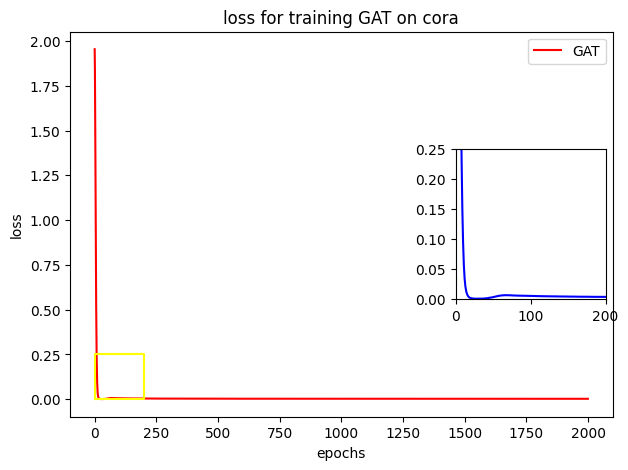

In [10]:
fig1 = plt.figure(figsize = (7,5)) # figsize is the size of the picture
ax1 = fig1.add_subplot(1, 1, 1) # ax1 is the name of the subgraph

# Draw the overall loss curve
p2 = pl.plot(x, y1,'r-', label = u'GAT')
pl.legend()

pl.xlabel(u'epochs')
pl.ylabel(u'loss')
plt.title('loss for training GAT on cora')

# Show an enlarged portion of the curve
tx0 = 0
tx1 = 200
ty0 = 0.000
ty1 = 0.25
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y1, color='blue', ls='-')
axins.axis([0, 200, 0.000, 0.25])
plt.savefig("graphs/GAT_cora_loss.png")
pl.show()

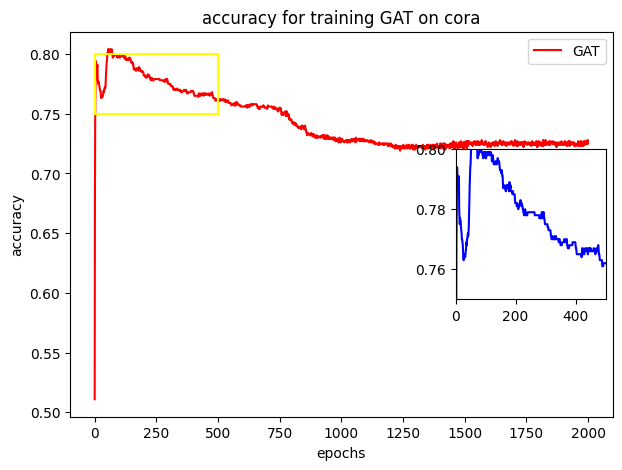

In [11]:
fig1 = plt.figure(figsize = (7,5)) # figsize is the size of the image
ax1 = fig1.add_subplot(1, 1, 1) # ax1 is the name of the subgraph

# Draw the overall loss curve

p2 = pl.plot(x, y2,'r-', label = u'GAT')
pl.legend()

pl.xlabel(u'epochs')
pl.ylabel(u'accuracy')
plt.title('accuracy for training GAT on cora')

# Show an enlarged portion of the curve
tx0 = 0
tx1 = 500
#Set the abscissa range of the area you want to enlarge
ty0 = 0.75
ty1 = 0.80
#Set the vertical coordinate range of the area you want to enlarge
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
pl.plot(sx,sy,"yellow")
axins = inset_axes(ax1, width=1.5, height=1.5, loc='right')

axins.plot(x,y2, color='blue', ls='-')
axins.axis([0, 500, 0.75, 0.80])
plt.savefig("graphs/GAT_cora_accuracy.png")
pl.show()

In [12]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.att_src 	 torch.Size([1, 8, 8])
conv1.att_dst 	 torch.Size([1, 8, 8])
conv1.bias 	 torch.Size([64])
conv1.lin.weight 	 torch.Size([64, 1433])
conv2.att_src 	 torch.Size([1, 1, 7])
conv2.att_dst 	 torch.Size([1, 1, 7])
conv2.bias 	 torch.Size([7])
conv2.lin.weight 	 torch.Size([7, 64])
Optimizer's state_dict:
state 	 {0: {'step': tensor(2000.), 'exp_avg': tensor([[[ 5.9041e-07,  7.1367e-07,  1.1048e-06,  1.7990e-06,  7.5739e-07,
          -2.1027e-08, -4.0388e-08,  3.6857e-07],
         [-1.3492e-06, -1.0841e-08, -7.1823e-11, -1.8070e-06, -8.4237e-07,
          -1.5760e-06, -1.8443e-06, -6.7620e-07],
         [ 2.6610e-06,  2.7470e-06, -1.0145e-07,  2.3414e-06,  3.3496e-06,
          -2.3945e-07,  1.1798e-05,  1.9665e-06],
         [ 4.5777e-15,  2.3649e-14,  3.7170e-13,  4.1586e-14, -1.4234e-13,
          -5.3001e-14,  1.7438e-13, -6.2335e-15],
         [ 7.1414e-13, -2.5682e-13,  3.6410e-12, -1.1207e-15, -4.1353e-13,
          -1.1015e-13,  7.2129e-13, -1.223

In [13]:
torch.save(model.state_dict(), "GATcora.pkl")

Spectral clustering

In [16]:
import numpy as np

# Assuming data.edge_index is a tensor containing edge indices
edges = data.edge_index.cpu().numpy().T  # Convert edge_index tensor to numpy array and transpose it
num_nodes = data.num_nodes  # Number of nodes in the graph

# Create a graph using the edge list
G = nx.Graph()
G.add_nodes_from(range(num_nodes))  # Add nodes to the graph
G.add_edges_from(edges)  # Add edges to the graph


In [15]:
import torch
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
# Set model to evaluation mode
model.eval()

# Get output features from the trained GAT model
with torch.no_grad():
    output_features = model(data).cpu().numpy()

# Perform spectral clustering on the output features
n_clusters = 7  # Define the number of clusters (communities)
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
predicted_labels = sc.fit_predict(output_features)

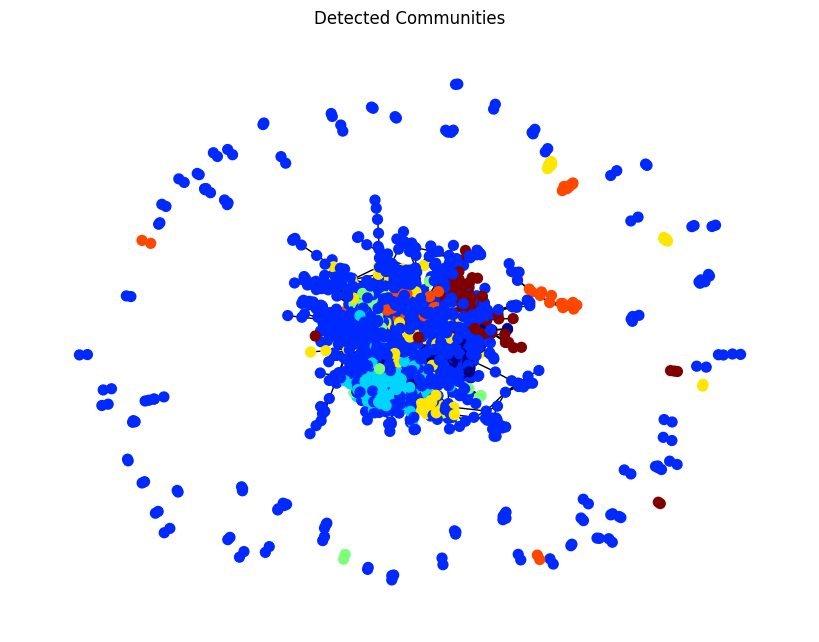

In [18]:
# Visualize the detected communities
edges = data.edge_index.cpu().numpy().T
num_nodes = data.num_nodes
G = nx.Graph()
G.add_nodes_from(range(num_nodes))
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=predicted_labels, node_size=50, cmap=plt.cm.jet)
plt.title('Detected Communities')
plt.show()

In [20]:
def compute_density(graph, communities):
    num_edges_within_communities = sum(len(graph.subgraph(community).edges()) for community in communities)
    num_nodes_within_communities = sum(len(community) for community in communities)
    total_possible_edges_within_communities = num_nodes_within_communities * (num_nodes_within_communities - 1) / 2
    density = num_edges_within_communities / total_possible_edges_within_communities
    return density

def compute_entropy(community_labels):
    num_nodes = len(community_labels)
    unique_labels, label_counts = np.unique(community_labels, return_counts=True)
    proportions = label_counts / num_nodes
    entropy = -np.sum(proportions * np.log(proportions))
    return entropy

def compute_modularity(graph, community_labels):
    num_edges = graph.number_of_edges()
    num_nodes = graph.number_of_nodes()
    modularity = nx.algorithms.community.modularity(graph, [set(np.where(community_labels == i)[0]) for i in np.unique(community_labels)])
    return modularity

def compute_conductance(graph, communities):
    cut_size = sum(nx.algorithms.cuts.cut_size(graph, community, graph.nodes - set(community)) for community in communities)
    volume = sum(nx.algorithms.cuts.volume(graph, community) for community in communities)
    if volume == 0:  # Avoid division by zero
        conductance = float('inf')
    else:
        conductance = cut_size / volume
    return conductance

# Assuming 'G' is the graph and 'predicted_labels' contains the predicted cluster labels
communities = [set(np.where(predicted_labels == i)[0]) for i in np.unique(predicted_labels)]
density = compute_density(G, communities)
entropy = compute_entropy(predicted_labels)
modularity = compute_modularity(G, predicted_labels)
conductance = compute_conductance(G, communities)
print(f"Overall: Density={density:.4f}, Entropy={entropy:.4f}, Modularity={modularity:.4f}, Conductance={conductance:.4f}")


Overall: Density=0.0011, Entropy=1.2785, Modularity=0.4144, Conductance=0.2427


In [ ]:
# Calculate Adjusted Rand Index and Normalized Mutual Information using only test set labels
true_labels_test = data.y[data.test_mask].cpu().numpy()  # Use only test set labels
predicted_labels_test = predicted_labels[data.test_mask]  # Use only predicted labels corresponding to the test set

ari = adjusted_rand_score(true_labels_test, predicted_labels_test)
nmi = normalized_mutual_info_score(true_labels_test, predicted_labels_test)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)


Adjusted Rand Index: 0.13218649205351968
Normalized Mutual Information: 0.32051848063926563


K Means Clustering (Finding K using elbow method)

In [22]:
import torch
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract features from the GAT model
model.eval()
with torch.no_grad():
    output_features = model.conv1(data.x, data.edge_index)

# Convert output features to numpy array
output_features_np = output_features.cpu().numpy()

# Step 2: Apply K-means clustering
def kmeans_clustering(features, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(features)
    return clusters

# Step 3: Use elbow method to find the optimal value of k
def elbow_method(features, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(features)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

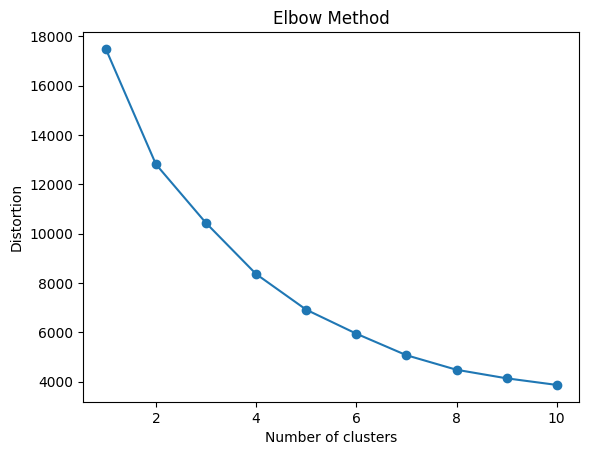

In [23]:
# Applying the elbow method to find the optimal number of clusters
elbow_method(output_features_np, 10)  # Adjust max_k as needed

# Based on the elbow method result, choose the optimal number of clusters (k)

# Step 4: Visualize the detected communities
def visualize_clusters(features, clusters):
    # Visualization code here (e.g., using PCA or t-SNE)
    pass

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


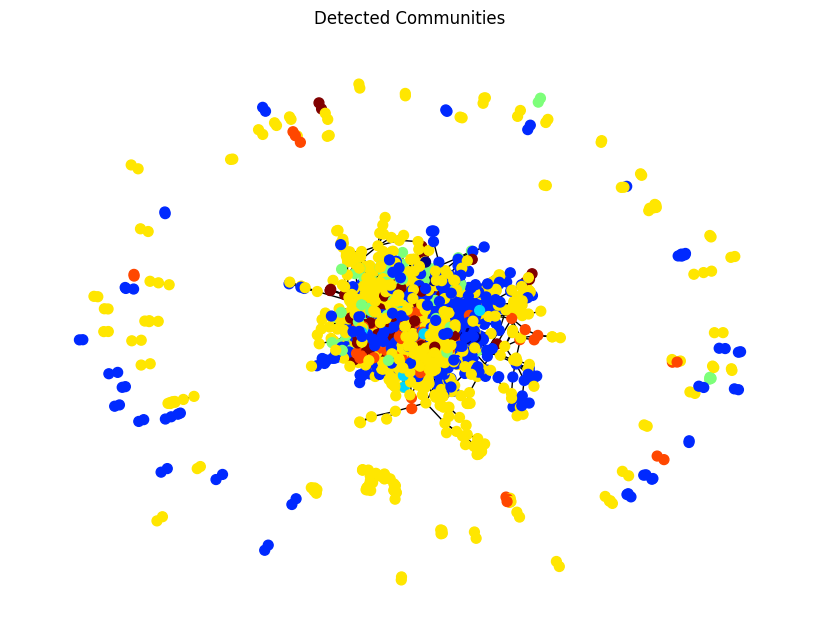

In [24]:
# Assuming you have determined the optimal value of k from the elbow method
k_optimal = 7  # Adjust as needed based on the elbow method result

# Step 4: Visualize the detected communities
def visualize_clusters(features, clusters):
    # Visualization code using NetworkX
    import networkx as nx
    import matplotlib.pyplot as plt

    # Create a graph
    edges = data.edge_index.cpu().numpy().T
    num_nodes = data.num_nodes
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.add_edges_from(edges)

    # Define node positions using a spring layout
    pos = nx.spring_layout(G)

    # Visualize the detected communities
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=clusters, node_size=50, cmap=plt.cm.jet)
    plt.title('Detected Communities')
    plt.show()

# Perform K-means clustering with the optimal value of k
clusters = kmeans_clustering(output_features_np, k_optimal)

# Visualize the detected communities
visualize_clusters(output_features_np, clusters)


In [38]:
import numpy as np
import networkx as nx

def calculate_metrics(G, clusters):
    # Density
    density = nx.density(G)

    # Entropy
    num_nodes = len(G.nodes)
    entropy = 0
    for cluster in np.unique(clusters):
        p_i = np.sum(clusters == cluster) / num_nodes
        entropy -= p_i * np.log(p_i)

    # Modularity
    modularity = nx.community.modularity(G, [set(np.where(clusters == i)[0]) for i in np.unique(clusters)])

    # Compute conductance manually
    conductance = calculate_conductance(G, clusters)

    return density, entropy, modularity, conductance

def calculate_conductance(G, clusters):
    conductances = []
    for cluster in np.unique(clusters):
        nodes_in_cluster = set(np.where(clusters == cluster)[0])
        external_edges = sum(1 for u, v in G.edges(nodes_in_cluster) if v not in nodes_in_cluster)
        internal_edges = sum(1 for u, v in G.edges(nodes_in_cluster) if v in nodes_in_cluster)
        if internal_edges != 0:  # Ensure there are internal edges to avoid division by zero
            conductance = external_edges / (internal_edges + external_edges)
            conductances.append(conductance)
    if conductances:
        return np.mean(conductances)
    else:
        return 0  # If there are no edges within any community, return 0 conductance


# Assuming G is your NetworkX graph
G = nx.Graph()
G.add_nodes_from(range(num_nodes))
G.add_edges_from(edges)

# Call the function to calculate metrics
density, entropy, modularity, conductance = calculate_metrics(G, clusters)

print("Density:", density)
print("Entropy:", entropy)
print("Modularity:", modularity)
print("Conductance:", conductance)


Density: 0.0014399999126942077
Entropy: 1.5506883829056175
Modularity: 0.39842037364446586
Conductance: 0.5671862488630997


In [ ]:
# Step 5: Calculate Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
def evaluate_clustering(true_labels, predicted_labels):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    return ari, nmi

# Evaluate clustering performance
ari, nmi = evaluate_clustering(true_labels, clusters)
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

Adjusted Rand Index (ARI): 0.11030142241717514
Normalized Mutual Information (NMI): 0.31288931722112223


Louvain Method

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


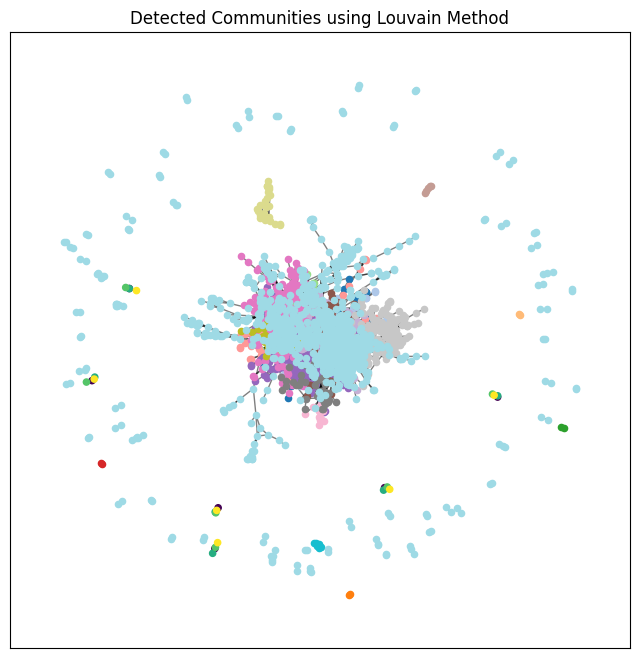

Adjusted Rand Index (ARI): 0.2687368924187094
Normalized Mutual Information (NMI): 0.45954000119934546


In [40]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GATConv
from torch_geometric.utils import to_networkx
import numpy as np
import networkx as nx
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

# Step 1: Extract features from the trained GAT model
model.eval()
with torch.no_grad():
    output_features = model(data).cpu().numpy()

# Step 2: Convert PyG graph to NetworkX graph
graph = to_networkx(data, to_undirected=True)

# Step 3: Apply community detection using Louvain method
partition = community_louvain.best_partition(graph)

# Step 4: Visualize the detected communities
pos = nx.spring_layout(graph)  # positions for all nodes
plt.figure(figsize=(8, 8))
# Draw nodes for each community with a different color
for community_id in set(partition.values()):
    nodes_in_community = [node for node, comm_id in partition.items() if comm_id == community_id]
    nx.draw_networkx_nodes(graph, pos, nodelist=nodes_in_community, node_size=20, node_color=plt.cm.tab20(community_id))
# Draw edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.title('Detected Communities using Louvain Method')
plt.show()

# Step 5: Calculate ARI and NMI
# Assuming ground truth communities are available in data.y
ground_truth = data.y.numpy()
ari = adjusted_rand_score(ground_truth, list(partition.values()))
nmi = normalized_mutual_info_score(ground_truth, list(partition.values()))

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)


In [41]:
def calculate_metrics(graph, partition):
    # Density
    density = nx.density(graph)

    # Entropy
    num_nodes = len(graph.nodes)
    entropy = 0
    for community_id in set(partition.values()):
        p_i = sum(1 for node, comm_id in partition.items() if comm_id == community_id) / num_nodes
        entropy -= p_i * np.log(p_i)

    # Modularity
    modularity = community_louvain.modularity(partition, graph)

    # Compute conductance manually
    conductance = calculate_conductance(graph, partition)

    return density, entropy, modularity, conductance

def calculate_conductance(graph, partition):
    conductances = []
    for community_id in set(partition.values()):
        nodes_in_community = [node for node, comm_id in partition.items() if comm_id == community_id]
        external_edges = sum(1 for u, v in graph.edges(nodes_in_community) if v not in nodes_in_community)
        internal_edges = sum(1 for u, v in graph.edges(nodes_in_community) if v in nodes_in_community)
        if internal_edges != 0:  # Ensure there are internal edges to avoid division by zero
            conductance = external_edges / (internal_edges + external_edges)
            conductances.append(conductance)
    if conductances:
        return np.mean(conductances)
    else:
        return 0  # If there are no edges within any community, return 0 conductance

# Call the function to calculate metrics
density, entropy, modularity, conductance = calculate_metrics(graph, partition)

print("Density:", density)
print("Entropy:", entropy)
print("Modularity:", modularity)
print("Conductance:", conductance)


Density: 0.0014399999126942077
Entropy: 3.1246085309278135
Modularity: 0.8098768350855715
Conductance: 0.0491727644174482
